In [1]:
# Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs, make_circles, make_moons

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_samples, silhouette_score

from scipy.spatial import Voronoi, voronoi_plot_2d

random_state = 42

ModuleNotFoundError: No module named 'pandas'

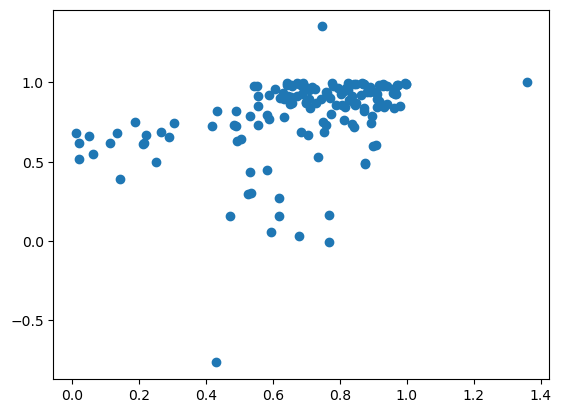

In [2]:
# Gathering data and removing outliers (one plot with, one without)

data = pd.read_csv('data.csv')
X_raw = data.loc[:,'Logic':'Beta']

outlier_1 = X_raw.iloc[41,:]
outlier_2 = X_raw.iloc[79,:]
outlier_3 = X_raw.iloc[127,:]

plt.scatter(X_raw.iloc[:,0],X_raw.iloc[:,1])
plt.show()

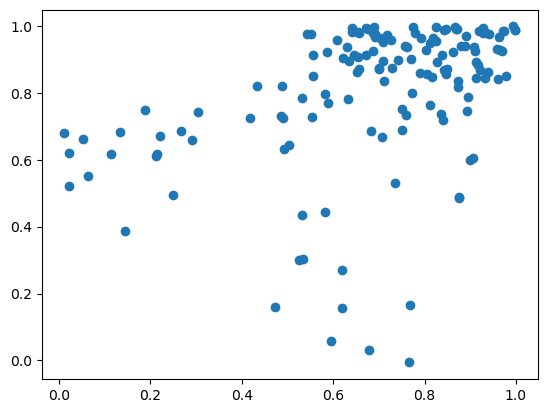

In [3]:
X = X_raw.drop(index=[41,79,127]) # removing the outliers above
plt.scatter(X.iloc[:,0],X.iloc[:,1])

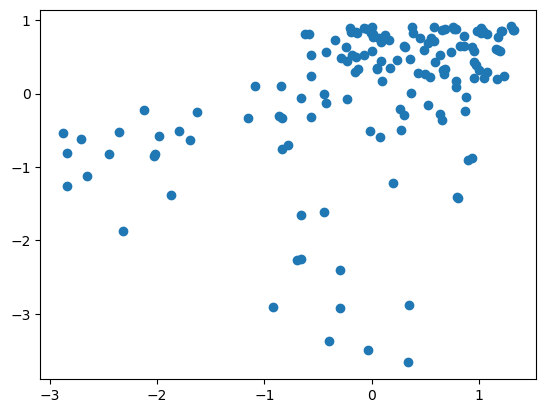

In [4]:
# Data transformation (standard scaling)

transformer = StandardScaler().fit(X)

X_t = transformer.transform(X)

plt.scatter(X_t[:,0],X_t[:,1])

In [5]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

ss = list(np.zeros(len(range_n_clusters)))
i = 0

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_t)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    ss[i] = silhouette_avg
    
    i += 1

For n_clusters = 2 The average silhouette_score is : 0.5835673841841811
For n_clusters = 3 The average silhouette_score is : 0.6018400056479061
For n_clusters = 4 The average silhouette_score is : 0.45717699994379946
For n_clusters = 5 The average silhouette_score is : 0.4807740074911122
For n_clusters = 6 The average silhouette_score is : 0.48635565202092806
For n_clusters = 7 The average silhouette_score is : 0.47892895466134927
For n_clusters = 8 The average silhouette_score is : 0.4642869385561828
For n_clusters = 9 The average silhouette_score is : 0.4189997323844421
For n_clusters = 10 The average silhouette_score is : 0.4079847048735921


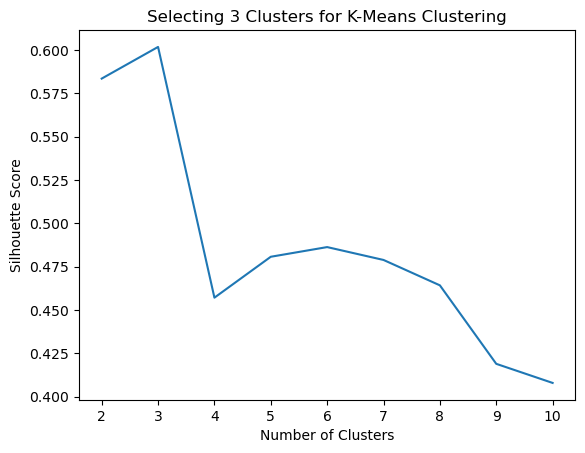

In [6]:
# Showing that 3 is the best pick with a secondary peak at 6

s_score = pd.DataFrame(ss,range(2,11))
s_score.to_csv('ss_as_function_of_n_clusters.csv')

fig, ax = plt.subplots(1)
ax.plot(s_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Selecting 3 Clusters for K-Means Clustering')
plt.show()

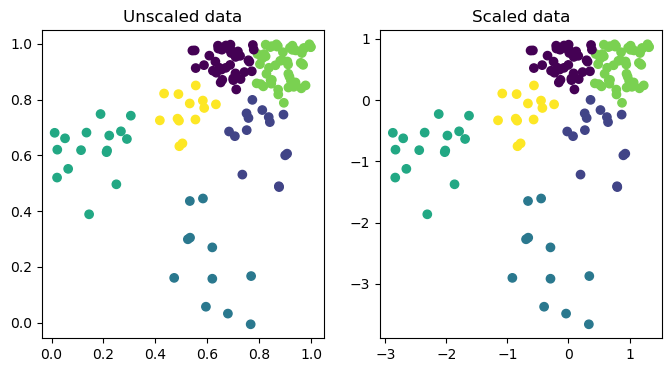

In [7]:
# Using K means on the data, plotting both scaled and unscaled

n_clusters = 6

fig, ax = plt.subplots(1,2,figsize = (8,4))
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
y_pred = clusterer.fit_predict(X_t)
centers=clusterer.cluster_centers_

ax[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred)
ax[0].set_title('Unscaled data')
ax[1].scatter(X_t[:, 0], X_t[:, 1], c=y_pred)
ax[1].set_title('Scaled data')

ss = silhouette_score(X_t, y_pred)

plt.show()

In [66]:
# Exporting data with the correct clustering labeling

retransformed_data = transformer.inverse_transform(X_t, copy=None)

Number = np.array(data.loc[:,'Number'].drop(index=[41,79,127]))

exported = pd.DataFrame(retransformed_data,y_pred)

exported['Number'] = Number

#exported.rename(columns={'0': 'Cohesiveness','1':'Logic'})
#exported.to_csv('20240806_exported_data.csv')

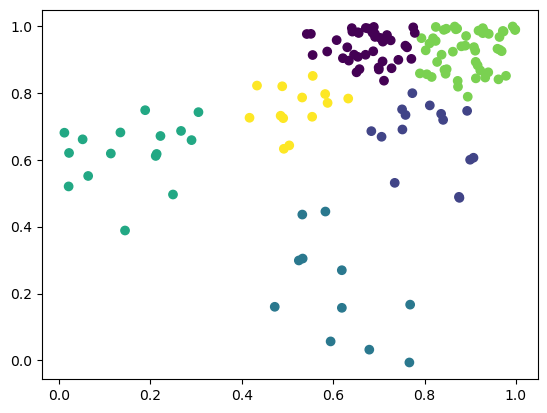

In [9]:
# Plot for copy/pasting

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred)

In [8]:
# Getting the centroids of each cluster and re-scaling 

unscaled_centers = pd.DataFrame(centers)
scaled_centers = pd.DataFrame(transformer.inverse_transform(unscaled_centers, copy=None))
scaled_centers.columns = {'x value','y value'}
#scaled_centers.to_csv('scaled_centroids.csv')

In [15]:
scaled_centers

,x value,y value
0,0.676528,0.937543
1,0.806480,0.667024
2,0.608399,0.211212
3,0.157028,0.622108
4,0.893384,0.925021
5,0.519644,0.754825


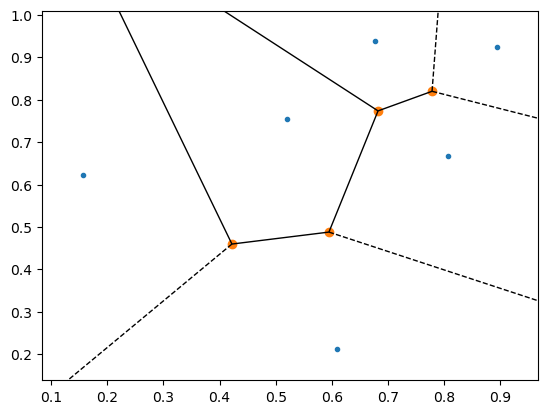

In [10]:
# Plotting scaled voronoi regions

vor = Voronoi(scaled_centers)
fig = voronoi_plot_2d(vor,plt.gca())

In [14]:
# The transformed vor vertex (point in above graph)

#print(vor.vertices)
vor_vertices = pd.DataFrame(vor.vertices)
#vor_vertices.to_csv('vor_vertices.csv')

In [20]:
#Finding points on the Voronoi lines for plotting visualizations 

#https://stackoverflow.com/questions/43835730/scipy-spatial-voronoi-how-to-know-where-a-ray-crosses-a-given-line

# bottom left line

pos_1 = 2
pos_2 = 3

x_1 = scaled_centers.iloc[pos_1,0]
x_2 = scaled_centers.iloc[pos_2,0]

y_1 = scaled_centers.iloc[pos_1,1]
y_2 = scaled_centers.iloc[pos_2,1]

y_star = 0 # set point

x_star_1 = ((y_star-y_1)**2 - (y_star-y_2)**2 + x_1**2 - x_2**2) / (2 * (x_1 - x_2))

coords = (np.array([x_star_1, y_star])).reshape(1, -1)

print(coords)

[[0.0034162 0.       ]]


In [22]:
# bottom right line

pos_1 = 1
pos_2 = 2

x_1 = scaled_centers.iloc[pos_1,0]
x_2 = scaled_centers.iloc[pos_2,0]

y_1 = scaled_centers.iloc[pos_1,1]
y_2 = scaled_centers.iloc[pos_2,1]

y_star = 0.3 # set point

x_star_1 = ((y_star-y_1)**2 - (y_star-y_2)**2 + x_1**2 - x_2**2) / (2 * (x_1 - x_2))

coords = (np.array([x_star_1, y_star])).reshape(1, -1)

print(coords)

[[1.02757003 0.3       ]]


In [25]:
# top right horizontal-ish line

pos_1 = 1
pos_2 = 4

x_1 = scaled_centers.iloc[pos_1,0]
x_2 = scaled_centers.iloc[pos_2,0]

y_1 = scaled_centers.iloc[pos_1,1]
y_2 = scaled_centers.iloc[pos_2,1]

y_star = 0.7 # set point

x_star_1 = ((y_star-y_1)**2 - (y_star-y_2)**2 + x_1**2 - x_2**2) / (2 * (x_1 - x_2))

coords = (np.array([x_star_1, y_star])).reshape(1, -1)

print(coords)

[[1.13499949 0.7       ]]


In [26]:
# top right vertical-ish line

pos_1 = 0
pos_2 = 4

x_1 = scaled_centers.iloc[pos_1,0]
x_2 = scaled_centers.iloc[pos_2,0]

y_1 = scaled_centers.iloc[pos_1,1]
y_2 = scaled_centers.iloc[pos_2,1]

y_star = 1.1 # set point

x_star_1 = ((y_star-y_1)**2 - (y_star-y_2)**2 + x_1**2 - x_2**2) / (2 * (x_1 - x_2))

coords = (np.array([x_star_1, y_star])).reshape(1, -1)

print(coords)

[[0.79469806 1.1       ]]
